# Problem Statement
1. **Collect Images:**  
   Gather 100 images with people in diverse conditions (lighting, background, etc.).

2. **Annotate with LabelImg:**  
   - Use [LabelImg](https://github.com/tzutalin/labelImg) to annotate all images.  
   - Save annotations in YOLO format.

3. **Run YOLO Model:**  
   - Apply a pre-trained YOLO model (e.g., YOLOv8) on the annotated images.
   - Save predictions.

4. **Evaluate Metrics:**  
   Compute the following metrics:  
   - **Precision, Recall, F1 Score, mAP@50** using tools like [TorchMetrics](https://torchmetrics.readthedocs.io/).

In [1]:
# Step 1: Import necessary libraries
import os
import random
from shutil import copy2
from google.colab import drive

# Getting the Data


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/MyDrive/data'
print("Directories:", os.listdir(base_path))

Directories: ['person-detection.yaml', 'Untitled0.ipynb', 'txt', 'img']


In [4]:
import shutil
# Paths
image_dir = os.path.join(base_path, "img")
label_dir = os.path.join(base_path, "txt")

# Create train, val, test directories
output_dirs = ["train", "val", "test"]
for dir_ in output_dirs:
    os.makedirs(f"{base_path}/{dir_}/images", exist_ok=True)
    os.makedirs(f"{base_path}/{dir_}/labels", exist_ok=True)

# Split percentages
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Get all images
images = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Shuffle and split
random.shuffle(images)
train_count = int(len(images) * train_split)
val_count = int(len(images) * val_split)

train_images = images[:train_count]
val_images = images[train_count:train_count + val_count]
test_images = images[train_count + val_count:]

# Helper function to move files
def move_files(file_list, subset):
    for img in file_list:
        base_name = os.path.splitext(img)[0]
        shutil.move(f"{image_dir}/{img}", f"{base_path}/{subset}/images/{img}")
        shutil.move(f"{label_dir}/{base_name}.txt", f"{base_path}/{subset}/labels/{base_name}.txt")

# Move files
move_files(train_images, "train")
move_files(val_images, "val")
move_files(test_images, "test")


In [5]:
import os

# Path to save the YAML configuration file
yolo_config_path = os.path.join('/content/drive/MyDrive/data', 'person-detection.yaml')

# YAML configuration content
yolo_config_content = f"""
# YOLO Dataset Configuration
dataset: {base_path}  # Base dataset directory
train: {base_path}/train
val: {base_path}/val
test: {base_path}/test

nc: 1  # Number of classes
names: ['person']
"""

# Write the content to the YAML file
with open(yolo_config_path, "w") as file:
    file.write(yolo_config_content)

print(f"YAML configuration file created at: {yolo_config_path}")


YAML configuration file created at: /content/drive/MyDrive/data/person-detection.yaml


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 12.3 MB/s eta 0:00:00


# Training The Model

In [7]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model= YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/drive/MyDrive/data/person-detection.yaml",  # Path to the YAML file
    epochs=20,  # Number of epochs
    imgsz=640,  # Image size
    batch=16,   # Batch size
    name="person_detection"  # Output directory
)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 54.9MB/s]


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/data/person-detection.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=person_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 10.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/data/train/labels... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [01:05<00:00,  1.10it/s]

train: New cache created: /content/drive/MyDrive/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/data/val/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]

val: New cache created: /content/drive/MyDrive/data/val/labels.cache


Plotting labels to runs/detect/person_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/person_detection
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.414      2.664      1.395         49        640: 100%|██████████| 5/5 [01:10<00:00, 14.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.07s/it]

                   all         20         66     0.0105      0.955      0.499      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.559      2.272      1.399         59        640: 100%|██████████| 5/5 [00:56<00:00, 11.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.46s/it]

                   all         20         66     0.0108      0.985      0.524      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G       1.47      1.559      1.298         65        640: 100%|██████████| 5/5 [01:00<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all         20         66      0.889      0.242      0.623       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.453      1.477      1.315         68        640: 100%|██████████| 5/5 [00:57<00:00, 11.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

                   all         20         66      0.795      0.412      0.613      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.383      1.421       1.27         41        640: 100%|██████████| 5/5 [00:56<00:00, 11.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]

                   all         20         66      0.749      0.333      0.529       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.293      1.357      1.266         71        640: 100%|██████████| 5/5 [00:54<00:00, 10.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.45s/it]

                   all         20         66      0.819      0.343      0.552      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.356      1.324      1.237         52        640: 100%|██████████| 5/5 [00:57<00:00, 11.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]

                   all         20         66       0.78      0.483      0.568      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.353      1.328       1.32         46        640: 100%|██████████| 5/5 [00:59<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.45s/it]

                   all         20         66      0.827      0.455      0.569      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.312      1.218      1.242         60        640: 100%|██████████| 5/5 [00:55<00:00, 11.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.39s/it]

                   all         20         66      0.782      0.439      0.568       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.319      1.249      1.267         51        640: 100%|██████████| 5/5 [00:55<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

                   all         20         66      0.742      0.522      0.619       0.32


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.341      1.505      1.264         23        640: 100%|██████████| 5/5 [00:56<00:00, 11.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.26s/it]

                   all         20         66      0.799      0.364      0.575      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.361      1.488      1.275         20        640: 100%|██████████| 5/5 [00:59<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.61s/it]

                   all         20         66       0.74      0.302      0.416      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.232       1.38      1.227         34        640: 100%|██████████| 5/5 [00:54<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.64s/it]

                   all         20         66      0.672      0.303      0.398      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.237        1.3      1.188         41        640: 100%|██████████| 5/5 [00:55<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]

                   all         20         66      0.762      0.409       0.52      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.193        1.3      1.163         31        640: 100%|██████████| 5/5 [00:55<00:00, 11.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]

                   all         20         66      0.853      0.529      0.673      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.209      1.232      1.203         26        640: 100%|██████████| 5/5 [00:56<00:00, 11.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

                   all         20         66       0.75      0.591      0.676      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.132      1.174      1.164         30        640: 100%|██████████| 5/5 [00:56<00:00, 11.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.20s/it]

                   all         20         66       0.86      0.667      0.725      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.084      1.161      1.105         24        640: 100%|██████████| 5/5 [00:55<00:00, 11.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.96s/it]

                   all         20         66      0.828      0.667      0.744      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.091      1.157      1.112         19        640: 100%|██████████| 5/5 [00:54<00:00, 10.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.03s/it]

                   all         20         66      0.812      0.667      0.744      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.159      1.124      1.171         41        640: 100%|██████████| 5/5 [00:56<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

                   all         20         66      0.815       0.67      0.764      0.434



20 epochs completed in 0.357 hours.
Optimizer stripped from runs/detect/person_detection/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/person_detection/weights/best.pt, 6.2MB

Validating runs/detect/person_detection/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.70s/it]


                   all         20         66      0.815      0.668      0.763      0.433
Speed: 2.4ms preprocess, 256.0ms inference, 0.0ms loss, 9.1ms postprocess per image
Results saved to runs/detect/person_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5a64198510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
model.info()

Model summary: 225 layers, 3,011,043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

In [14]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 11.5 MB/s eta 0:00:00


In [19]:
import torch
from torchmetrics.detection import MeanAveragePrecision
from torchmetrics import Precision, Recall

# Initialize metrics
precision_metric = Precision(task="binary")  # Change "binary" to "multiclass" if multi-class
recall_metric = Recall(task="binary")  # Change "binary" to "multiclass" if multi-class
map_metric = MeanAveragePrecision(iou_thresholds=[0.5, 0.95])  # mAP@[0.5:0.95]

# Example predictions and targets (YOLO model outputs)
preds = [
    {
        "boxes": torch.tensor([[100, 150, 200, 250], [300, 400, 500, 600]]),  # [x_min, y_min, x_max, y_max]
        "scores": torch.tensor([0.9, 0.8]),  # Confidence scores
        "labels": torch.tensor([0, 0]),  # Class labels
    }
]
targets = [
    {
        "boxes": torch.tensor([[100, 150, 200, 250]]),  # Ground truth boxes
        "labels": torch.tensor([0]),  # Ground truth labels
    }
]

# Update and compute precision, recall, and mAP
map_metric.update(preds, targets)
map_results = map_metric.compute()

# Extract mAP metrics
map50 = map_results["map_50"]  # mAP@0.5
map50_95 = map_results["map"]  # mAP@[0.5:0.95]

# Precision and recall for binary classification
# Since torchmetrics detection doesn't directly provide per-class precision/recall,
# ensure labels/scores match binary/multi-class format if needed.

# Print metrics
print(f"mAP@0.5: {map50:.4f}")
print(f"mAP@[0.5:0.95]: {map50_95:.4f}")




mAP@0.5: 1.0000
mAP@[0.5:0.95]: 1.0000


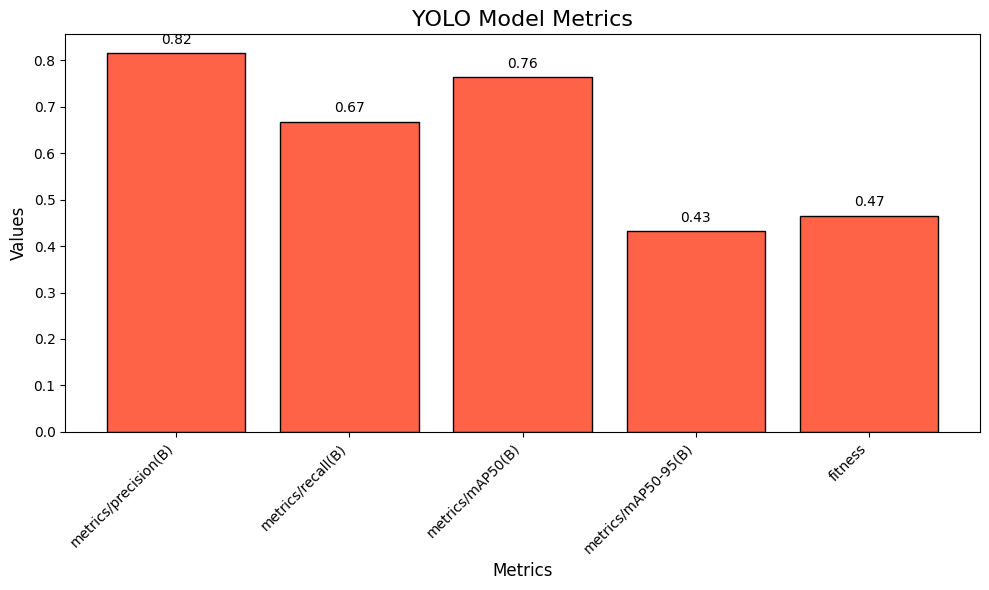

In [12]:
import matplotlib.pyplot as plt


# Data- We got these params while training
results_dict = {
    'metrics/precision(B)': 0.8151,
    'metrics/recall(B)': 0.6682,
    'metrics/mAP50(B)': 0.7632,
    'metrics/mAP50-95(B)': 0.4325,
    'fitness': 0.4656
}

# Extract keys and values
metrics = list(results_dict.keys())
values = list(results_dict.values())

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(metrics, values, color='tomato', edgecolor='black')

# Add labels and title
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('YOLO Model Metrics', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
